<font size= "5">Importing Libs</font>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
%matplotlib inline

<font size= "5">Importing Data</font>

In [3]:
df = pd.read_csv('train.csv')

In [4]:
dt = pd.read_csv('test.csv')

NameError: name 'pd' is not defined

<font size= "5">Analyzing Data</font>

In [5]:
df.head()

,Price,Carat,Color,Clarity,Cut
0,6877,1.40,H,SI2,Very Good
1,4416,1.01,J,VS1,Very Good
2,4866,0.80,F,VVS1,Ideal
3,3522,0.92,E,SI1,Very Good
4,1102,0.40,E,VS1,Excellent


In [6]:
dt.head()

,Carat,Color,Clarity,Cut
0,1.26,G,SI2,Good
1,1.02,F,VVS2,Very Good
2,1.00,H,SI1,Very Good
3,0.96,H,VS2,Very Good
4,0.72,F,SI1,Good


In [7]:
from sklearn.preprocessing import LabelEncoder

<font size = "5">Handling with cathegorical data from train data set</font>

In [8]:
df['Color_encoded'] = LabelEncoder().fit_transform(df['Color'])

In [9]:
df['Clarity_encoded'] = LabelEncoder().fit_transform(df['Clarity'])

In [10]:
df['Cut_encoded'] = df['Cut'].map( {'Good':0, 'Very Good':1, 'Excellent':2,'Ideal':3})

<font size = "5">Handling with cathegorical data from **TEST** data set</font>

In [11]:
dt['Color_encoded'] = LabelEncoder().fit_transform(dt['Color'])

In [12]:
dt['Clarity_encoded'] = LabelEncoder().fit_transform(dt['Clarity'])

In [13]:
dt['Cut_encoded'] = dt['Cut'].map( {'Good':0, 'Very Good':1, 'Excellent':2,'Ideal':3})

<font size = "5">Veryfing cathegorical data handled</font>

In [14]:
df.head()

,Price,Carat,Color,Clarity,Cut,Color_encoded,Clarity_encoded,Cut_encoded
0,6877,1.40,H,SI2,Very Good,4,2,1
1,4416,1.01,J,VS1,Very Good,6,3,1
2,4866,0.80,F,VVS1,Ideal,2,5,3
3,3522,0.92,E,SI1,Very Good,1,1,1
4,1102,0.40,E,VS1,Excellent,1,3,2


In [16]:
dt.head()

,Carat,Color,Clarity,Cut,Color_encoded,Clarity_encoded,Cut_encoded
0,1.26,G,SI2,Good,3,2,0
1,1.02,F,VVS2,Very Good,2,6,1
2,1.00,H,SI1,Very Good,4,1,1
3,0.96,H,VS2,Very Good,4,4,1
4,0.72,F,SI1,Good,2,1,0


<font size = "5">Some graphs insights </font>

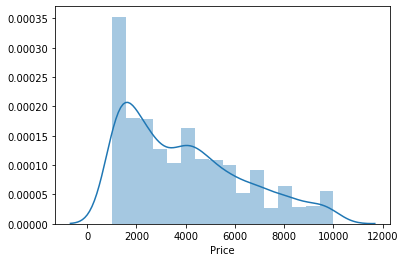

In [17]:
sns.distplot(df['Price'])

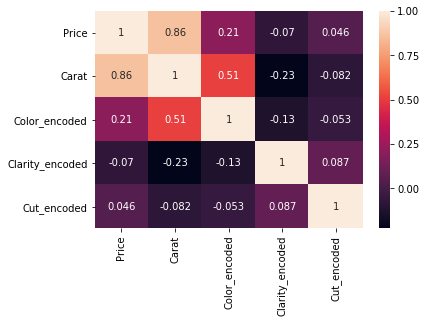

In [18]:
sns.heatmap(df.corr(),annot=True)

<font size = "5"> Let's create our model train and test </font>

In [19]:
df.columns

Index(['Price', 'Carat', 'Color', 'Clarity', 'Cut', 'Color_encoded',
       'Clarity_encoded', 'Cut_encoded'],
      dtype='object')

In [20]:
X = df[['Carat','Color_encoded','Clarity_encoded', 'Cut_encoded']]

In [21]:
y = df['Price']

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
lm = LinearRegression()

In [26]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
print(lm.intercept_)

-2886.560566166423


In [28]:
lm.coef_

array([7925.32710713, -372.30074851,  178.18200471,  363.59158124])

In [29]:
X_train.columns

Index(['Carat', 'Color_encoded', 'Clarity_encoded', 'Cut_encoded'], dtype='object')

<font size = "5">Trying to understand the relation between each vector component with price or something like that</font>

In [30]:
cdf = pd.DataFrame(lm.coef_,X.columns,columns=['Coeff'])

In [31]:
cdf

,Coeff
Carat,7925.327107
Color_encoded,-372.300749
Clarity_encoded,178.182005
Cut_encoded,363.591581


<font size = "5">Time to make predictons on **TEST** data set </font>

In [32]:
X_dt = dt[['Carat','Color_encoded','Clarity_encoded', 'Cut_encoded']]

In [33]:
predictions = lm.predict(X_dt)

In [34]:
#plt.scatter(X_dt,predictions)

<font size = "5">Creating submission File</font>

In [35]:
submission = pd.DataFrame({'Id':np.arange(1, 691),'Price':predictions})

In [36]:
submission.head()

,Id,Price
0,1,6338.813353
1,2,5885.355196
2,3,4091.337133
3,4,4308.870063
4,5,2253.255459


In [37]:
filename = 'submission.csv'

submission.to_csv(filename,index=False)

print('Saved file: ' + filename)


Saved file: submission.csv
